# Explore here

It's recommended to use this notebook for exploration purposes.

For example: 

1. You could import the CSV generated by python into your notebook and explore it.
2. You could connect to your database using `pandas.read_sql` from this notebook and explore it.

In [3]:
!pip install -r '../requirements.txt'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 36.9 MB/s eta 0:00:0031m35.6 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 132.2 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 101.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 120.4 MB/s eta 0:00:00m eta 0:00:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 MB 27.6 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 142.8 MB/s eta 0:00:00m eta 0:00:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 156.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 156.4 MB/s eta 0:00:00m eta 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [6]:
!pip install seaborn
!pip install sklearn
!pip install xgboost


[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.9/192.9 MB 9.4 MB/s eta 0:00:00m eta 0:00:010:00:01

[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip


In [7]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt  
import pickle
import seaborn as sns
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [8]:
df_raw = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/random-forest-project-tutorial/main/titanic_train.csv')
df_raw

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [9]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
df_raw.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
df_raw.shape

(891, 12)

In [27]:
df_raw.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [13]:
df_raw.sample(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
778,779,0,3,"Kilgannon, Mr. Thomas J",male,NaN,0,0,36865,7.7375,NaN,Q
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
252,253,0,1,"Stead, Mr. William Thomas",male,62.0,0,0,113514,26.5500,C87,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
195,196,1,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C
151,152,1,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22.0,1,0,113776,66.6000,C2,S
842,843,1,1,"Serepeca, Miss. Augusta",female,30.0,0,0,113798,31.0000,NaN,C
226,227,1,2,"Mellors, Mr. William John",male,19.0,0,0,SW/PP 751,10.5000,NaN,S
388,389,0,3,"Sadlier, Mr. Matthew",male,NaN,0,0,367655,7.7292,NaN,Q
489,490,1,3,"Coutts, Master. Eden Leslie ""Neville""",male,9.0,1,1,C.A. 37671,15.9000,NaN,S


In [19]:
# duplicated
for col in df_raw.columns:
    duplicates = df_raw[col].duplicated().sum()
    print(f'Dataset have {duplicates} duplicated {df_raw[col].name}')


Dataset have 0 duplicated PassengerId
Dataset have 889 duplicated Survived
Dataset have 888 duplicated Pclass
Dataset have 0 duplicated Name
Dataset have 889 duplicated Sex
Dataset have 802 duplicated Age
Dataset have 884 duplicated SibSp
Dataset have 884 duplicated Parch
Dataset have 210 duplicated Ticket
Dataset have 643 duplicated Fare
Dataset have 743 duplicated Cabin
Dataset have 887 duplicated Embarked


In [20]:
df = df_raw.copy().drop(['PassengerId','Cabin', 'Ticket', 'Name'], axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [21]:
X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [22]:
df_train = pd.concat([X_train, y_train], axis=1)
df_train.sample(10)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
730,1,female,29.0,0,0,211.3375,S,1
510,3,male,29.0,0,0,7.7500,Q,1
64,1,male,NaN,0,0,27.7208,C,0
771,3,male,48.0,0,0,7.8542,S,0
890,3,male,32.0,0,0,7.7500,Q,0
234,2,male,24.0,0,0,10.5000,S,0
577,1,female,39.0,1,0,55.9000,S,1
810,3,male,26.0,0,0,7.8875,S,0
222,3,male,51.0,0,0,8.0500,S,0
226,2,male,19.0,0,0,10.5000,S,1


In [23]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 298 to 102
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    668 non-null    int64  
 1   Sex       668 non-null    object 
 2   Age       536 non-null    float64
 3   SibSp     668 non-null    int64  
 4   Parch     668 non-null    int64  
 5   Fare      668 non-null    float64
 6   Embarked  666 non-null    object 
 7   Survived  668 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 47.0+ KB


In [24]:
df_train.sample(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
509,3,male,26.0,0,0,56.4958,S,1
552,3,male,NaN,0,0,7.8292,Q,0
366,1,female,60.0,1,0,75.2500,C,1
557,1,male,NaN,0,0,227.5250,C,0
413,2,male,NaN,0,0,0.0000,S,0
4,3,male,35.0,0,0,8.0500,S,0
183,2,male,1.0,2,1,39.0000,S,1
698,1,male,49.0,1,1,110.8833,C,0
24,3,female,8.0,3,1,21.0750,S,0
352,3,male,15.0,1,1,7.2292,C,0


In [25]:
df_train.describe()

,Pclass,Age,SibSp,Parch,Fare,Survived
count,668.000000,536.000000,668.000000,668.000000,668.000000,668.000000
mean,2.333832,29.421343,0.553892,0.372754,32.179397,0.378743
std,0.823707,14.526010,1.185279,0.795588,51.604012,0.485437
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,20.750000,0.000000,0.000000,7.925000,0.000000
50%,3.000000,28.000000,0.000000,0.000000,14.400000,0.000000
75%,3.000000,38.000000,1.000000,0.000000,30.500000,1.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [26]:
df_train.describe(include='object')

,Sex,Embarked
count,668,666
unique,2,3
top,male,S
freq,439,491


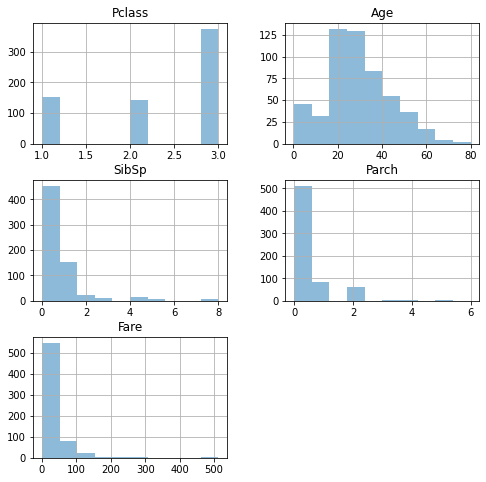

In [28]:
X_train.hist(figsize=(8,8), alpha=0.5)
plt.show()

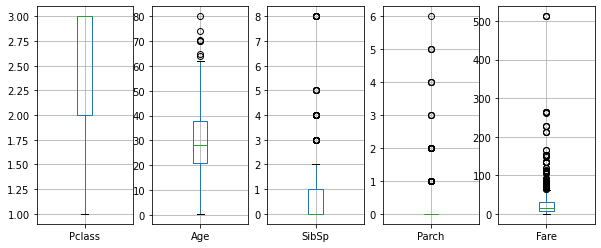

In [29]:
fig, ax = plt.subplots(1,5, figsize=(10,4))
axs = ax.flatten()
for i in range(len(axs)):
    X_train._get_numeric_data().iloc[:,i].to_frame().boxplot(ax=axs[i])

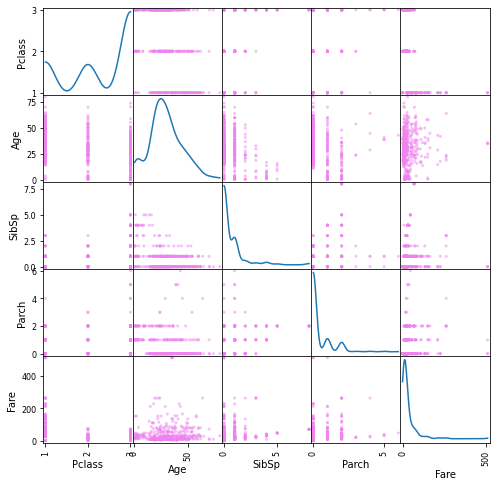

In [30]:
pd.plotting.scatter_matrix(X_train, diagonal='kde', figsize=(8,8), c='Violet')
plt.show()

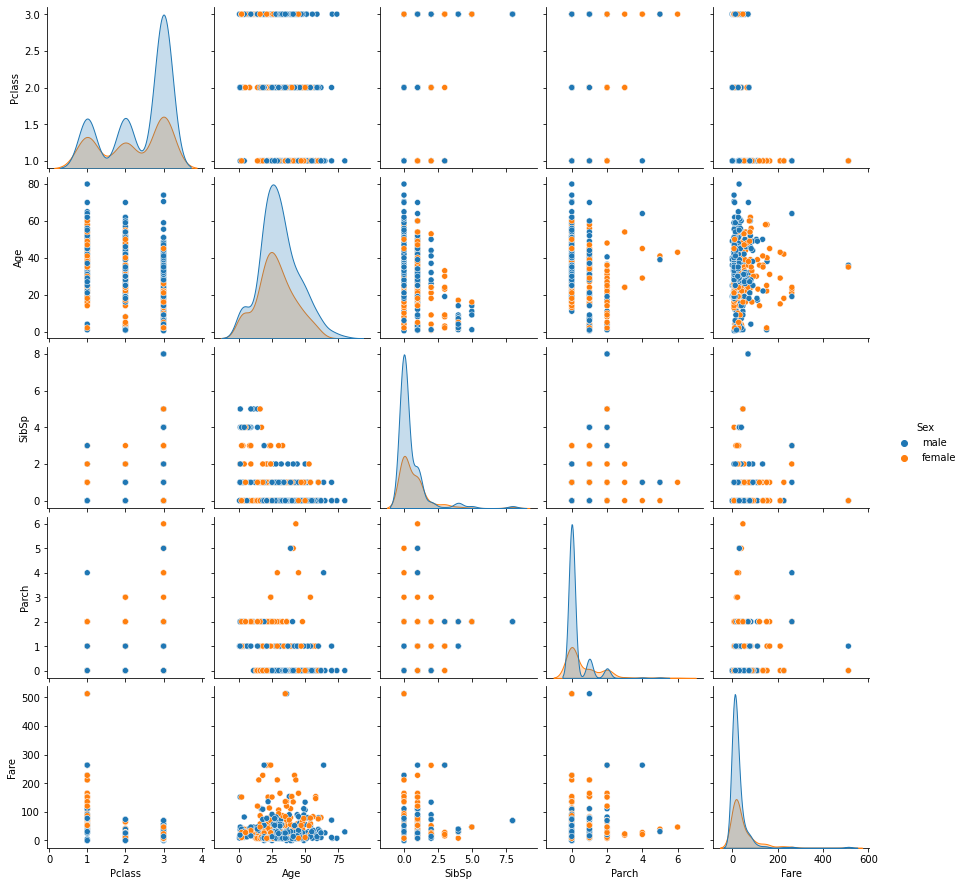

In [31]:
sns.pairplot(data=X_train, hue='Sex')
plt.show()

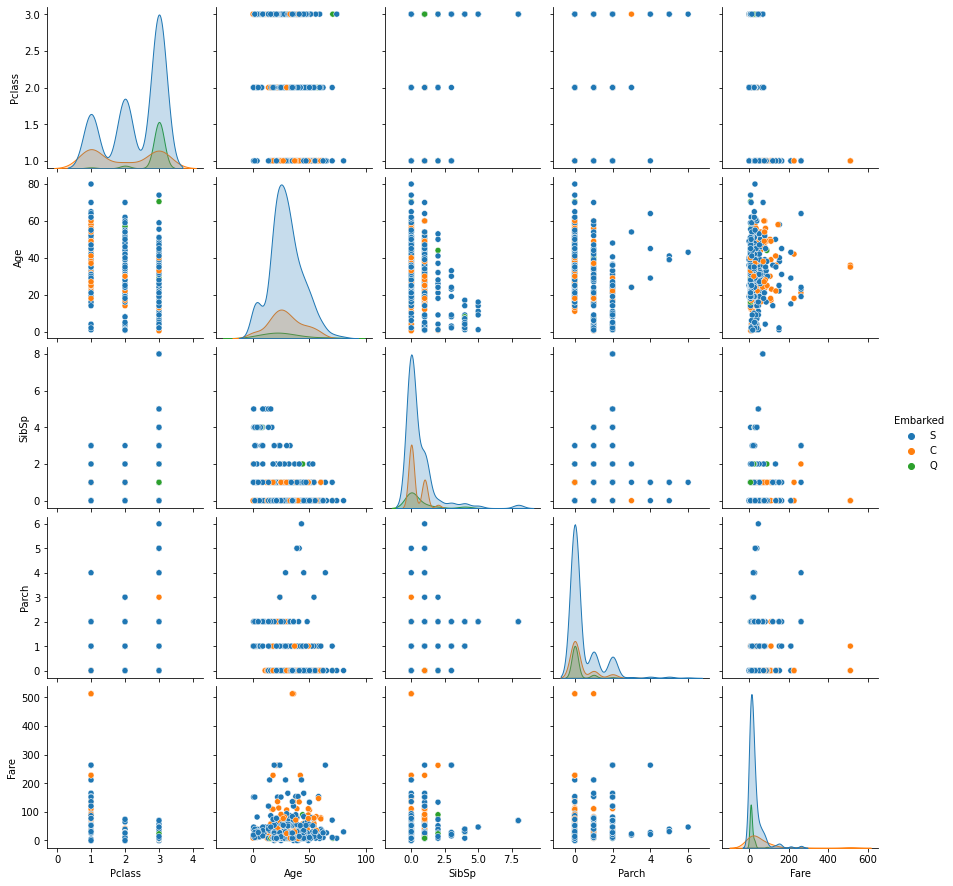

In [32]:
sns.pairplot(data=X_train, hue='Embarked')
plt.show()

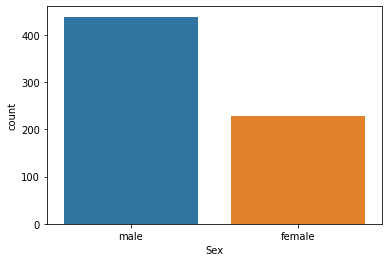

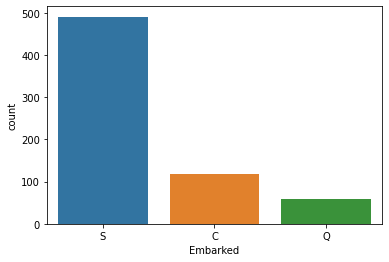

In [34]:
columns = ['Sex', 'Embarked']

for col in columns:
    sns.countplot(data=X_train, x=col)
    plt.show()

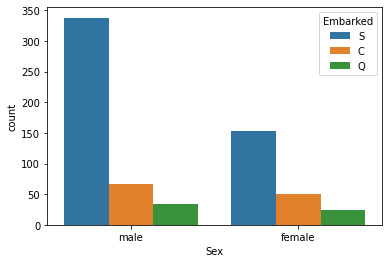

In [35]:
sns.countplot(data=X_train, x='Sex', hue='Embarked')
plt.show()

In [36]:
X_train.corr().style.background_gradient(cmap='Blues')

,Pclass,Age,SibSp,Parch,Fare
Pclass,1.000000,-0.367164,0.080592,0.018018,-0.539389
Age,-0.367164,1.000000,-0.304151,-0.196888,0.094639
SibSp,0.080592,-0.304151,1.000000,0.438936,0.164716
Parch,0.018018,-0.196888,0.438936,1.000000,0.216105
Fare,-0.539389,0.094639,0.164716,0.216105,1.000000


In [37]:
df_train.corr().style.background_gradient(cmap='Blues')

,Pclass,Age,SibSp,Parch,Fare,Survived
Pclass,1.000000,-0.367164,0.080592,0.018018,-0.539389,-0.320427
Age,-0.367164,1.000000,-0.304151,-0.196888,0.094639,-0.068632
SibSp,0.080592,-0.304151,1.000000,0.438936,0.164716,-0.042042
Parch,0.018018,-0.196888,0.438936,1.000000,0.216105,0.076448
Fare,-0.539389,0.094639,0.164716,0.216105,1.000000,0.252576
Survived,-0.320427,-0.068632,-0.042042,0.076448,0.252576,1.000000


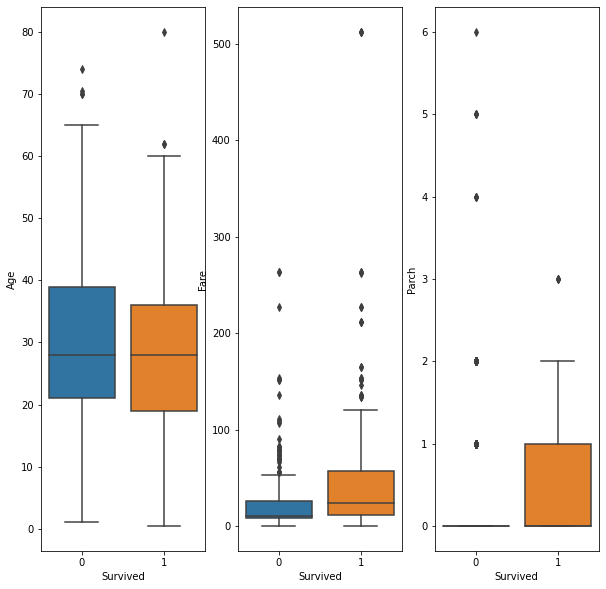

In [46]:
fig, axs = plt.subplots(ncols=3, figsize=(10,10))
sns.boxplot(data=df_train, x='Survived', y='Age', ax=axs[0])
sns.boxplot(data=df_train, x='Survived', y='Fare', ax=axs[1])
sns.boxplot(data=df_train, x='Survived', y='Parch', ax=axs[2])
plt.show()

In [50]:
imputer_mean = SimpleImputer(strategy='mean', missing_values=np.nan)
imputer_mean = imputer_mean.fit(X_train[['Age']])
X_train['Age'] = imputer_mean.transform(X_train[['Age']])

print('Age mean is:',imputer_mean.statistics_)



imputer_mode = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
imputer_mode = imputer_mode.fit(X_train[['Embarked']])
X_train['Embarked'] = imputer_mode.transform(X_train[['Embarked']])

print('Embarked mode is:',imputer_mode.statistics_)


Age mean is: [29.42134328]
Embarked mode is: ['S']


In [52]:
X_test['Age'] = imputer_mean.transform(X_test[['Age']])
X_test['Embarked'] = imputer_mode.transform(X_test[['Embarked']])

In [54]:
X_train[['Sex','Embarked']] = X_train[['Sex','Embarked']].astype('category')
X_test[['Sex','Embarked']] = X_test[['Sex','Embarked']].astype('category')


X_train['Sex'] = X_train['Sex'].cat.codes
X_train['Embarked'] = X_train['Embarked'].cat.codes

X_test['Sex'] = X_test['Sex'].cat.codes
X_test['Embarked'] = X_test['Embarked'].cat.codes

In [55]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)
print(f'Accuracy in train dataset: {rfc.score(X_train, y_train)}')
print(f'Accuracy in test dataset: {rfc.score(X_test, y_test)}')

Accuracy in train dataset: 0.9820359281437125
Accuracy in test dataset: 0.7892376681614349


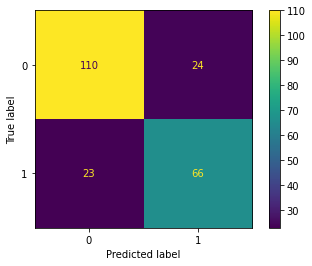

In [56]:
y_pred_rfc = rfc.predict(X_test)
cm = confusion_matrix(y_test, y_pred_rfc, labels=rfc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
display_labels=rfc.classes_)
disp.plot()

plt.show()

In [57]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.83      0.82      0.82       134
           1       0.73      0.74      0.74        89

    accuracy                           0.79       223
   macro avg       0.78      0.78      0.78       223
weighted avg       0.79      0.79      0.79       223



In [58]:
param_grid = [{
    'max_depth': [8, 12, 16], 
    'min_samples_split': [12, 16, 20], 
    'criterion': ['gini', 'entropy']
}]

param_grid

[{'max_depth': [8, 12, 16],
  'min_samples_split': [12, 16, 20],
  'criterion': ['gini', 'entropy']}]

In [59]:

rfc2 = RandomForestClassifier(random_state=1107)
grid =  GridSearchCV(estimator=rfc2, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid.fit(X_train, y_train)
print('Best parameters to select:', grid.best_params_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ..criterion=gini, max_depth=8, min_samples_split=12; total time=   0.6s
[CV] END ..criterion=gini, max_depth=8, min_samples_split=16; total time=   0.5s
[CV] END ..criterion=gini, max_depth=8, min_samples_split=16; total time=   0.5s
[CV] END ..criterion=gini, max_depth=8, min_samples_split=12; total time=   0.5s
[CV] END ..criterion=gini, max_depth=8, min_samples_split=16; total time=   0.6s
[CV] END ..criterion=gini, max_depth=8, min_samples_split=12; total time=   0.6s
[CV] END ..criterion=gini, max_depth=8, min_samples_split=12; total time=   0.6s
[CV] END ..criterion=gini, max_depth=8, min_samples_split=12; total time=   0.5s
[CV] END ..criterion=gini, max_depth=8, min_samples_split=16; total time=   0.7s
[CV] END ..criterion=gini, max_depth=8, min_samples_split=16; total time=   0.5s
[CV] END ..criterion=gini, max_depth=8, min_samples_split=20; total time=   0.5s
[CV] END ..criterion=gini, max_depth=8, min_samp

In [65]:
rfc_model = grid.best_estimator_
y_pred_cv = rfc_model.predict(X_test)
print(f'Accuracy RFC selected by CV is {grid.score(X_test, y_test)}')


Accuracy RFC selected by CV is 0.8071748878923767


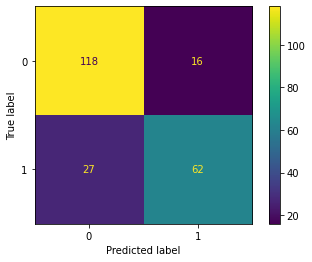

In [66]:
cm = confusion_matrix(y_test, y_pred_cv, labels=grid.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
display_labels=grid.classes_)
disp.plot()
plt.show()

In [69]:
print(classification_report(y_test,y_pred_cv))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85       134
           1       0.79      0.70      0.74        89

    accuracy                           0.81       223
   macro avg       0.80      0.79      0.79       223
weighted avg       0.81      0.81      0.80       223



Feature: 0, Score: 0.12447
Feature: 1, Score: 0.45652
Feature: 2, Score: 0.13867
Feature: 3, Score: 0.03921
Feature: 4, Score: 0.03589
Feature: 5, Score: 0.17174
Feature: 6, Score: 0.03350


/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


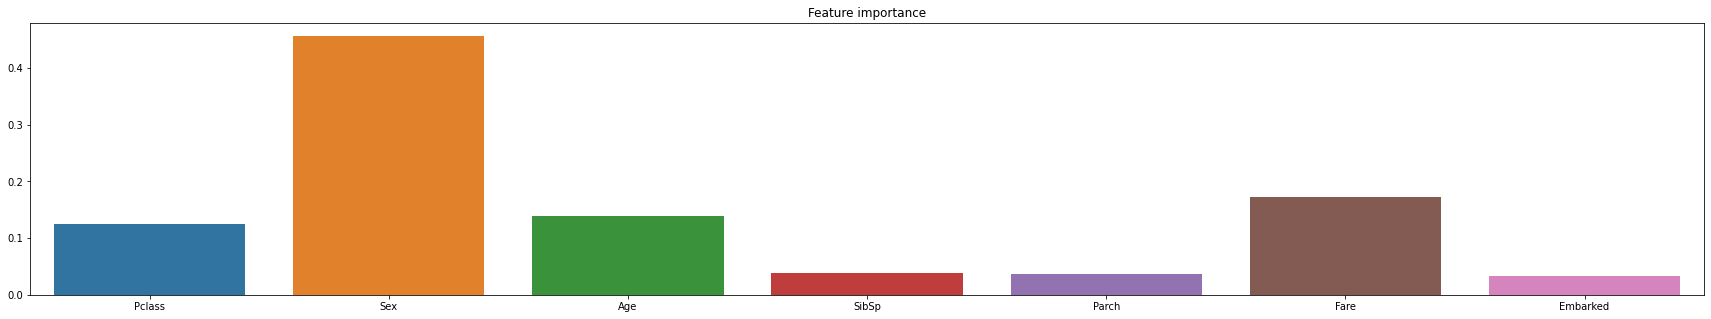

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [71]:
importance = rfc_model.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

plt.figure(figsize=(30,5))
columns = X.columns
sns.barplot(columns, importance)
plt.title('Feature importance')
plt.show()
columns

In [72]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
criterion=['gini','entropy']

random_grid = {'n_estimators': n_estimators,
#'max_features': max_features, # Son muy pocas variables por lo cual no vale la pena aplicarlo
'max_depth': max_depth,
'min_samples_split': min_samples_split,
'min_samples_leaf': min_samples_leaf,
'bootstrap': bootstrap,
'criterion':criterion}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False], 'criterion': ['gini', 'entropy']}


In [73]:
rfc3 = RandomForestClassifier(random_state=1107)

grid_random = RandomizedSearchCV(
    estimator=rfc3,
    n_iter=100,
    cv=5,
    random_state=1107,
    param_distributions=random_grid)

grid_random.fit(X_train,y_train)
print('Best parameters:', grid_random.best_params_)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1107),
                   n_iter=100,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=1107)

In [74]:
best_param = grid_random.best_params_
best_model = RandomForestClassifier(**best_param)
best_model

RandomForestClassifier(bootstrap=False, max_depth=20, min_samples_leaf=4,
                       n_estimators=800)

In [75]:
print('Best model:', grid_random.best_estimator_) 

Best model: RandomForestClassifier(bootstrap=False, max_depth=20, min_samples_leaf=4,
                       n_estimators=800, random_state=1107)


In [76]:
model_cv_2 = grid_random.best_estimator_

Feature: 0, Score: 0.11860
Feature: 1, Score: 0.43014
Feature: 2, Score: 0.14350
Feature: 3, Score: 0.03873
Feature: 4, Score: 0.03025
Feature: 5, Score: 0.20713
Feature: 6, Score: 0.03166


/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


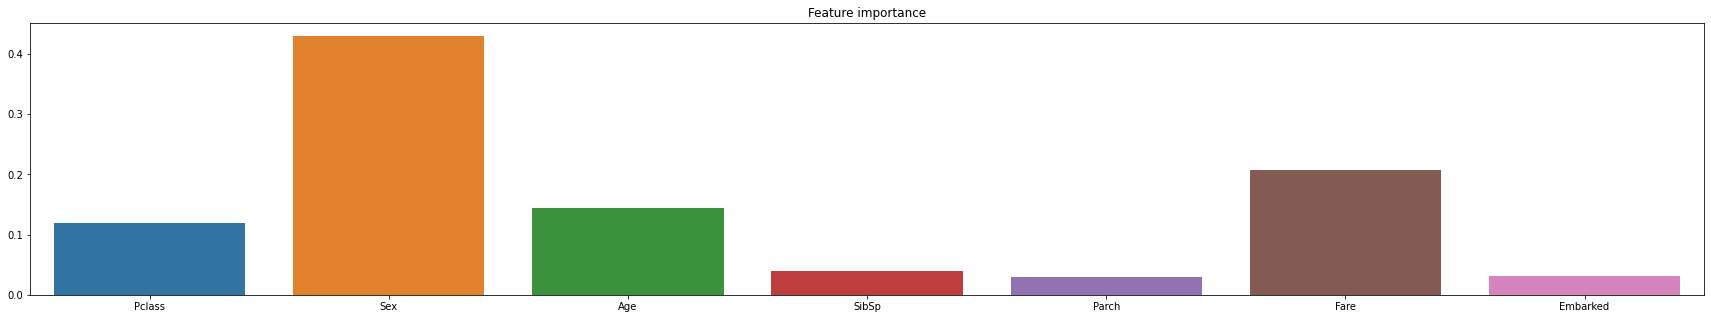

In [77]:
importance = model_cv_2.feature_importances_

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

# graficamos la importancia de las variables

plt.figure(figsize=(30,5))
columns = X_train.columns
sns.barplot(columns, importance)
plt.title('Feature importance')
plt.show()

In [78]:
filename = '../models/final_model.sav'
pickle.dump(model_cv_2, open(filename, 'wb'))

# XGB

In [79]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train, y_train)
pred = xgb.predict(X_test)
print('Accuracy of xgboost is:',accuracy_score(y_test, pred))

Accuracy of xgboost is: 0.7892376681614349


In [80]:
xgb_2 = XGBClassifier()

parameters = {
    "eta"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
    "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
    "min_child_weight" : [ 1, 3, 5, 7 ],
    "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
    "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

grid_xgb = RandomizedSearchCV(
    xgb_2,
    parameters, n_jobs=4,
    scoring="neg_log_loss",
    cv=3)

grid_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None,
                                           reg_alpha=None, reg_lambda=None, ...),
                   n_jobs=4,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'eta': [0.05, 0.1, 0.15, 0.2, 0.25,
                                                0.3],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='neg_log_loss')

In [83]:
xgb_2 = grid_xgb.best_estimator_
prediction = xgb_2.predict(X_test)
print(f'Accuracy xgboost with hyperparameters: {accuracy_score(y_test, prediction)}')


Accuracy xgboost with hyperparameters: 0.820627802690583
